### Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx

### Importing the data:

In [2]:
data = pd.read_csv("groceries.csv", sep='\t',header=None)
data.columns = ["items"]
data

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


### Preprocessing the data:

In [3]:
data = list(data["items"].apply(lambda x:x.split(',')))
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
data = pd.DataFrame(te_data,columns=te.columns_).astype(int)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data.iloc[:,5:]
data

,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Trying to see which are the frequent items bought together by changing the Support value:

In [13]:
# function to compute the frequent item set
def frequent_itemsets(suppport, length):
    frequent_itemsets = apriori(data, min_support=suppport, max_len=length,use_colnames = True)
    return frequent_itemsets 

In [14]:
# To plot the network map graph. arguments= rules dataset, x-axis, y-axis
def plotting_frequent_items(rules, x=20,y=20):
    fig, ax=plt.subplots(figsize=(x,y))
    graph=nx.from_pandas_edgelist(rules,source="antecedents",target='consequents')
    nx.draw(graph,with_labels=True)
    plt.show()

### Building the model:

In [19]:
fi_1 = frequent_itemsets(0.05, 3)
fi_1.sort_values('support',ascending = False,inplace=True)
fi_1.sort_values

<bound method DataFrame.sort_values of      support                        itemsets
26  0.255516                    (whole milk)
15  0.193493              (other vegetables)
19  0.183935                    (rolls/buns)
23  0.174377                          (soda)
27  0.139502                        (yogurt)
2   0.110524                 (bottled water)
20  0.108998               (root vegetables)
24  0.104931                (tropical fruit)
22  0.098526                 (shopping bags)
21  0.093950                       (sausage)
16  0.088968                        (pastry)
6   0.082766                  (citrus fruit)
1   0.080529                  (bottled beer)
14  0.079817                    (newspapers)
5   0.077682                   (canned beer)
17  0.075648                     (pip fruit)
28  0.074835  (other vegetables, whole milk)
11  0.072293         (fruit/vegetable juice)
25  0.071683            (whipped/sour cream)
3   0.064870                   (brown bread)
9   0.063447    

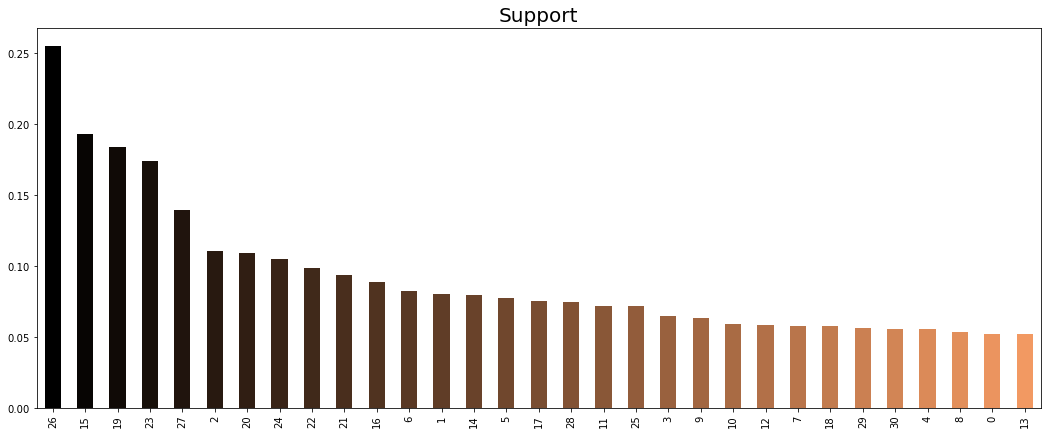

In [20]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
fi_1["support"].plot.bar(color = color)
plt.title('Support', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

###### Observation: Whole Milk is bought the most and other vegetables is the second most bought item

In [21]:
rules = association_rules(fi_1, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452


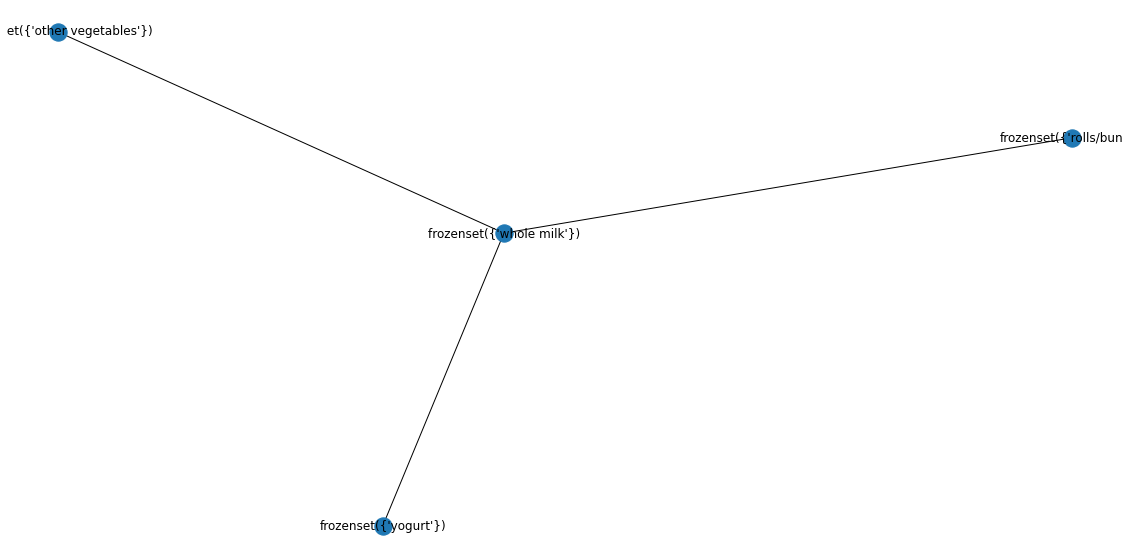

In [23]:
plotting_frequent_items(rules, 20, 10)

######  We can see that Whole milk is bought the most and the other items are related to it. So if a person buys whole milk he most probably will buy other vegetables, yogurt or rolls/buns

### Reducing the support value:

In [26]:
fi_2 = frequent_itemsets(0.03, 3)
fi_2.sort_values('support',ascending = False,inplace=True)
fi_2.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
42  0.255516                (whole milk)
26  0.193493          (other vegetables)
30  0.183935                (rolls/buns)
35  0.174377                      (soda)
43  0.139502                    (yogurt)
..       ...                         ...
25  0.031012                    (onions)
54  0.030605       (rolls/buns, sausage)
45  0.030503  (citrus fruit, whole milk)
36  0.030402       (specialty chocolate)
53  0.030097     (pip fruit, whole milk)

[63 rows x 2 columns]>

In [27]:
rules1 = association_rules(fi_2, metric="lift", min_threshold=1)
rules1.head(20)
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
29,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
28,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
18,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
19,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
26,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
27,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
7,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


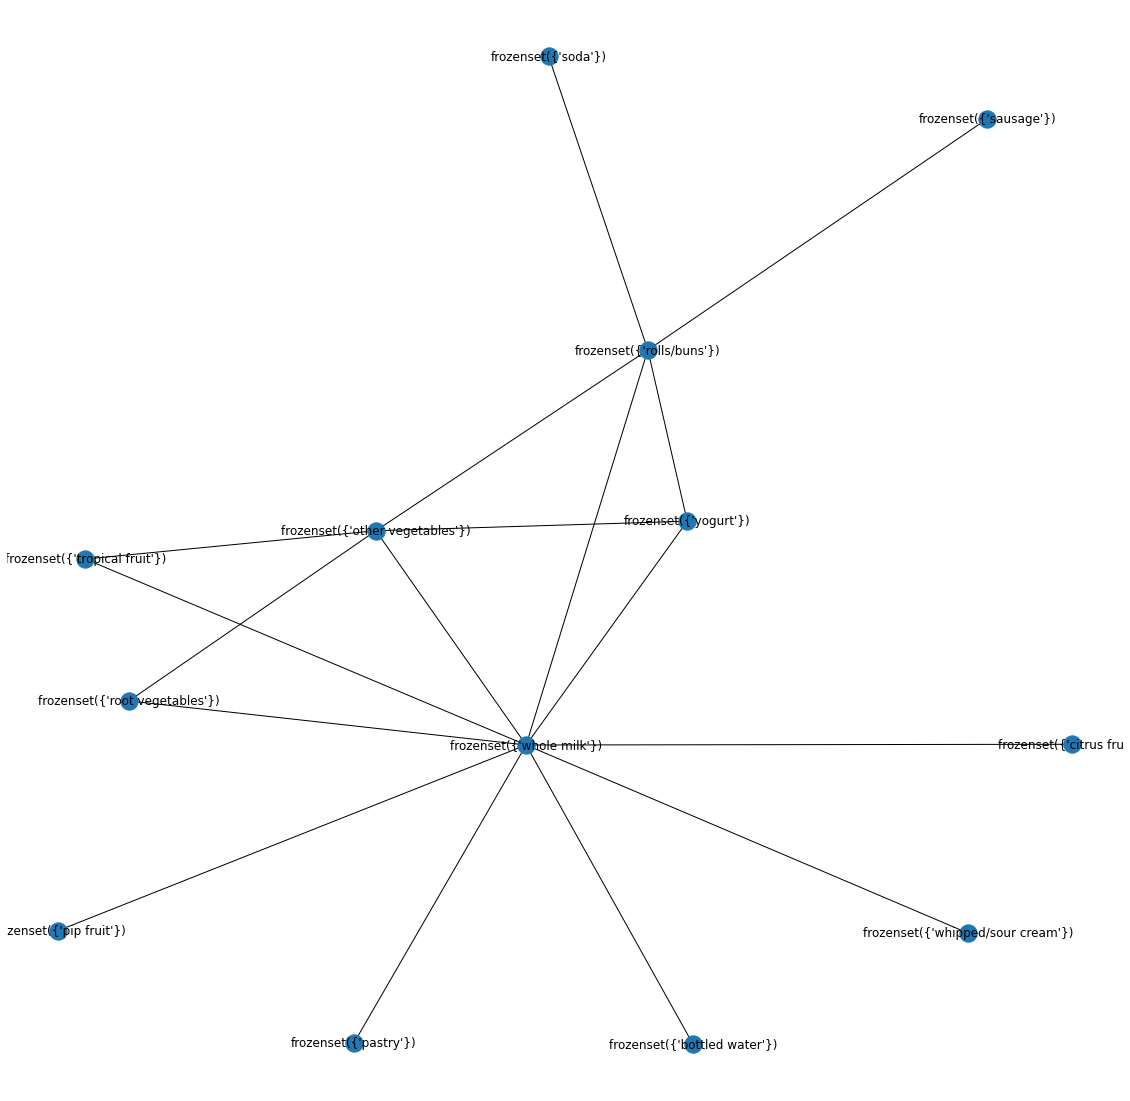

In [28]:
plotting_frequent_items(rules1)

###### Observation: We can see that when the support value is decreased the items increase and therefore we can see more items in the above plot. This is because much more items pass the support value threshold 

###  Decreasing the minimum value to 2:

In [37]:
fi_3 = frequent_itemsets(0.03, 2)
fi_3.sort_values('support',ascending = False,inplace=True)
fi_3.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
42  0.255516                (whole milk)
26  0.193493          (other vegetables)
30  0.183935                (rolls/buns)
35  0.174377                      (soda)
43  0.139502                    (yogurt)
..       ...                         ...
25  0.031012                    (onions)
54  0.030605       (rolls/buns, sausage)
45  0.030503  (citrus fruit, whole milk)
36  0.030402       (specialty chocolate)
53  0.030097     (pip fruit, whole milk)

[63 rows x 2 columns]>

In [38]:
rules2 = association_rules(fi_3, metric="lift", min_threshold=1)
rules2.head(20)
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
29,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
28,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
18,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
19,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
26,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
27,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
7,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
6,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


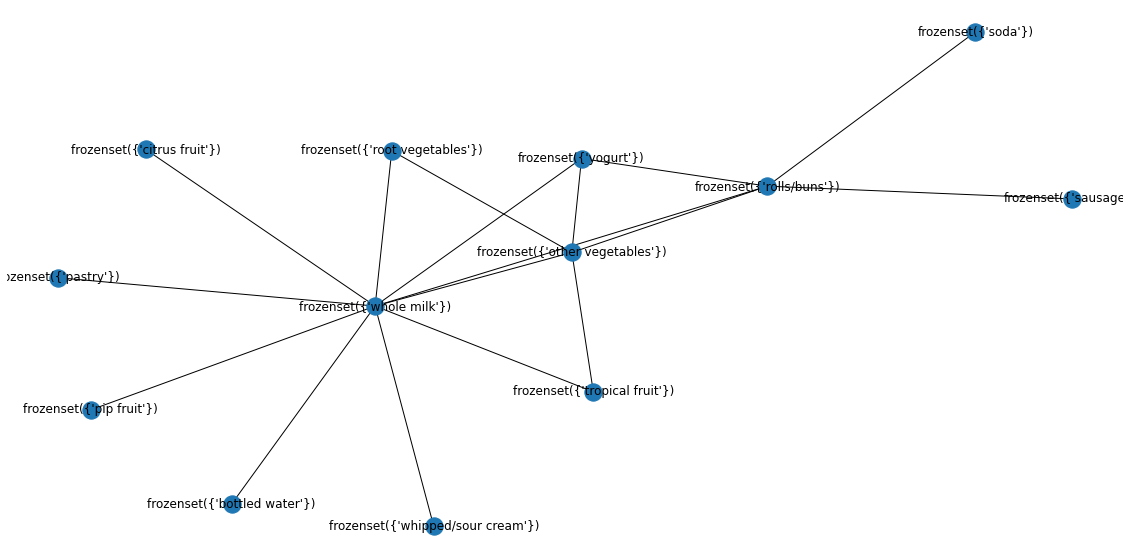

In [39]:
plotting_frequent_items(rules2, 20, 10)

###### Observation: We can see more items because our support value threshold is low. we have decreased the number of items to 2 and therefore we are getting the relation between only 2 items

### Increasing the confidence threshold:

In [40]:
fi_4 = frequent_itemsets(0.03, 2)
fi_4.sort_values('support',ascending = False,inplace=True)
fi_4.sort_values

<bound method DataFrame.sort_values of      support                    itemsets
42  0.255516                (whole milk)
26  0.193493          (other vegetables)
30  0.183935                (rolls/buns)
35  0.174377                      (soda)
43  0.139502                    (yogurt)
..       ...                         ...
25  0.031012                    (onions)
54  0.030605       (rolls/buns, sausage)
45  0.030503  (citrus fruit, whole milk)
36  0.030402       (specialty chocolate)
53  0.030097     (pip fruit, whole milk)

[63 rows x 2 columns]>

In [45]:
rules3 = association_rules(fi_3, metric="confidence", min_threshold=0.4)
rules3.head(20)
rules3.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
4,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
1,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
3,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


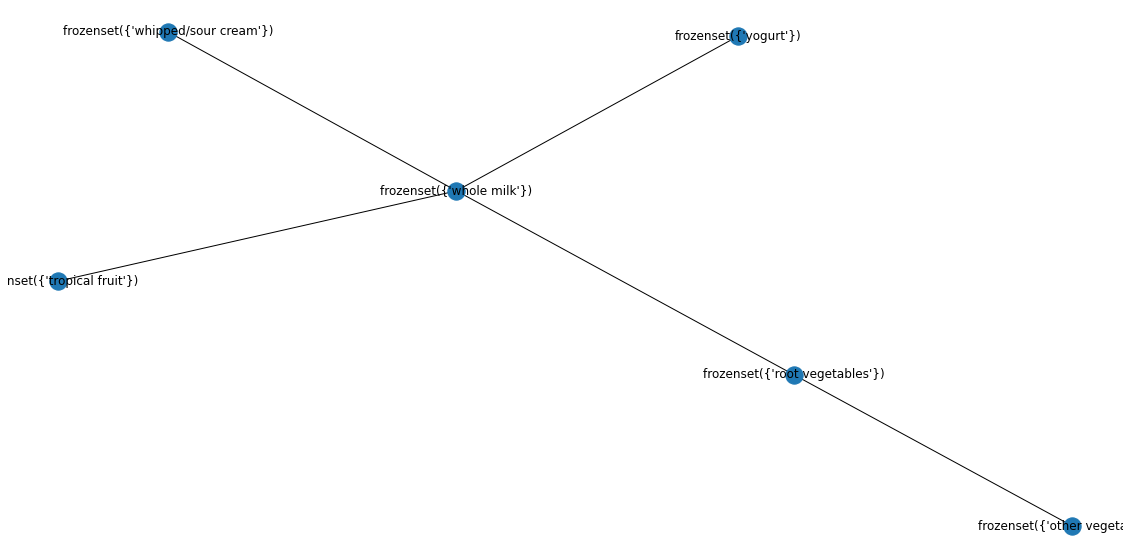

In [46]:
plotting_frequent_items(rules3, 20, 10)

###### Observation: We can easily find the association with the most frequently bought items